# Notebook activity 4.1 A parallel slopes model in R

In this notebook activity, we will use R to fit a parallel slopes model. We will use the data from the manna ash trees dataset first introduced in Subsection 2.2.2 in Unit 1, taking `height` as the response, and using the covariate `diameter` and the factor `side` as explanatory variables. As a reminder, these variables are described as follows.

* `height`: the height of the tree (in metres), rounded to the nearest metre
* `diameter`: the diameter of the tree (in metres, to two decimal places) at 1.3 m above the ground
* `side`: the side of Walton Drive that the tree is located on, taking possible values west and east.

The data are stored in the data frame `mannaAsh`.

## (a) Getting started

### (i)

Start by loading the `M348` package and the `mannaAsh` data frame, then checking that `mannaAsh` has loaded correctly, by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the mannaAsh data frame
data(mannaAsh)
# Check the data frame has loaded OK
head(mannaAsh)

### (ii)

Check that `side` is a factor but that `diameter` is not by running the following code.

In [ ]:
class(mannaAsh$side)
class(mannaAsh$diameter)

#### Solution <a class="tocSkip">

The output confirms that `side` is a factor. The result `'numeric'` means that `diameter` is a numeric vector and hence not a factor. 

### (iii)

Confirm that east is level 1 of `side` by running the following code

In [ ]:
levels(mannaAsh$side)

#### Solution <a class="tocSkip">

The first label listed is 'east', so this is level 1 of `side`.

## (b) Fitting a parallel slopes model 

In Notebook activity 2.1 you saw that the command `modelFit <- lm(Y ~ x1 + x2 + ... + xq, data = dataFrame)` is used to fit a multiple regression model for response variable $Y$ that includes covariates $x_1, x_2, \ldots, x_q$ and store the results in the object `modelFit`. (Assuming the vectors `Y`, `x1`, ... `xq` are in a data frame called `dataFrame`.)

This command reduces to `modelFit <- lm(Y ~ x1 + x2, data = dataFrame)` when there are just two covariates, $x_1$ and $x_2$, and to `modelFit <- lm(Y ~ x, data = dataFrame)` when there is just a single covariate, $x$.

Furthermore, in Notebook Activity 3.1 you saw that the code for regression with a factor has the general form: `lm(Y ~ A, data = dataFrame)`. Notice that this has the same general form, just with `A` written instead of a single covariate `x`.

In this notebook activity, we will be fitting a parallel slopes model. This is a multiple regression model where the explanatory variables are a single covariate $x$ and a single factor $A$. So, you will probably not be surprised that  we can use the same command as used for multiple regression, but with `A` and `x`  replacing `x1` and `x2`, that is:

`modelFit <- lm(Y ~ A + x, data = dataFrame)`.

(Assuming the vectors `Y`, `A` and `x` are in a data frame called `dataFrame`.)

As usual, we can see the output from fitting the model by using the `summary()` command.

### (i)

Remove the `#` and adapt the code below to fit a parallel slopes model for the response `height` with the covariate `diameter` and the factor `side` as the explanatory variables. Store the results from the fit in an object called `heightParallelFit` and and use the `summary()` function to obtain a summary of the fitted model.

In [4]:
# modelFit ~ lm (Y ~ A + x, data = dataFrame)
# summary(modelFit)

#### Solution <a class="tocSkip">

The required code and resulting output is shown below.

In [5]:
heightParallelFit <- lm(height ~ side + diameter, data = mannaAsh)
summary(heightParallelFit)


Call:
lm(formula = height ~ side + diameter, data = mannaAsh)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8813 -0.8584 -0.0691  0.6825  2.5248 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.2912     1.1063   1.167     0.25    
sidewest      2.6206     0.4423   5.924 6.59e-07 ***
diameter     19.7970     3.8755   5.108 8.90e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.191 on 39 degrees of freedom
Multiple R-squared:  0.5429,	Adjusted R-squared:  0.5195 
F-statistic: 23.16 on 2 and 39 DF,  p-value: 2.341e-07


###  <a class="tocSkip">

The output from using the `summary()` function you obtained in part (b)(i) has the same format as we have seen so far in the module. 

The table of coefficients contains output for the following parameters.
* `(Intercept)` is the baseline mean for `height`, $\mu$, for level 1 of the factor `side`when `diameter` is zero
* `sidewest` is the parameter $\alpha_2$, which is the effect on `height` of level 2 of the factor `side` *in comparison to* the effect of level 1 east of the factor `side`, after controlling for `diameter`
* `diameter` is the slope parameter, $\beta$, associated with the covariate `diameter`.


As usual, estimates of each parameter, together with the $p$-values associated with each parameter, are displayed in the table. 

So, for example, the fitted model for a tree for which `side` is east is given by:

$\text{height} = 1.2912 + 19.7970\, \text{diameter} \simeq 1.29 + 19.80\, \text{diameter}$,

and the fitted model for a tree for which `side` is west is 

\begin{equation*} \begin{align*}
\text{height} & = (1.2912 + 2.6206) + 19.7970 \, \text{diameter} \\
& = 3.9118 + 19.7970\, \text{diameter}\\
& \simeq 3.91 + 19.80 \, \text{diameter}.
\end{align*}\end{equation*}

## (c) Testing model parameters

### Testing the covariate

For deciding whether the covariate should be included in the model after controlling for the factor, we can use a $t$-test (Figure 7, Subsection 2.2 of Unit 4). The results of this $t$-test can be obtained using `summary()` in the same way that results from similar $t$-tests for simple linear regression and multiple regression are obtained.

### (i)

Explain why the output you obtained in part (b)(i) provides evidence that the covariate `diameter` should be included in our model for `height`.

#### Solution <a class="tocSkip">

From the table of coefficients produced after using the `summary()` function, the $p$-value associated with `diameter` is very small (8.90e-06) and so there is strong evidence to suggest that `diameter`  should be included in the model.

### Testing the factor

In general, to test whether the factor $A$ should be included in the model after controlling for the covariate $x$, we compare the fits of the following two models:
* $Y \sim x$, the model which doesn't include $A$ 
* $Y \sim A + x$, the model which includes $A$. 

(This is summarised in Box 3, Subsection 2.2 of Unit 4.)

In part (b)(i) we have already fitted the second of these models: 

`height ~ side + diameter`, 

so, we now need to fit the simpler model: 

`height ~ diameter`.

This is what we will do next.

### (ii)

In the empty code cell below, fit the model 

`height ~ diameter`,

storing the results in the object `heightSLRFit`. (You won't need to see a summary of the results.)

#### Solution <a class="tocSkip">

The required code and resulting output are given below. We don't need a summary of the results (and we don't need to use `summary()`), so running the code won't produce any on screen results.

In [6]:
heightSLRFit <- lm(height ~ diameter, data = mannaAsh)

###  <a class="tocSkip">

We are now in a position where we can test whether the factor $A$ should be included in the model in addition to the covariate $x$.

As mentioned in Subsection 2.2 of Unit 4, we use an ANOVA test to do this (which compares the values of the RSS for the models $Y \sim x$ and $Y \sim A + x$). In order to do this, we shall make use of the `anova()` function. 

(Note that this is different to the `aov()` function used in Unit 3. The `aov()` function is used to fit a regression model with a factor (and has the model to be fitted as its argument) and then produce an ANOVA table for the fitted model. On the other hand, the `anova()` function is used to compare the results of two nested fitted models.) 

Here, we are comparing the unexplained variation of *two* fitted models, and the `anova()` function therefore needs *two* arguments - namely, the two object names containing the results after fitting the two models. Then, the command for carrying out the required $F$-test and obtaining the associated test statistic value and $p$-value is:

`anova(fit1, fit2)`,

where `fit1` is the object name storing output from the fitted model $Y \sim x$ (that is, the smaller model with larger RSS), and `fit2` is the object name storing output from the fitted model $Y \sim A + x$ (that is, the larger model with smaller RSS).

### (iii)

Run the code cell below to carry out the test of whether `side` should be included in the model in addition to `diameter`. 

In [ ]:
# Carry out ANOVA test to compare the fit of the model height ~ diameter 
# and the model height ~ diameter + side
anova(heightSLRFit, heightParallelFit)

###  <a class="tocSkip">

The two rows of the table you produced in part (iii), relate to the fits of the models given the two models, in the order they were given as arguments to `anova()`. So in this case, the first row relates to the model associated with `heightSLRFit`: `height ~ diameter`. Similarly the second row relates to the model associated with `heightParallelFit`: `height ~ side + diameter`.

The columns of the table are as follows.

* `Res.DF` gives the residual degree of freedom
* `RSS` column gives residual sum of squares
* `DF` gives the extra number of parameters that the second model has compared with the first model. So, in this case the value is 1 in the table above because `side` has just two levels
* `Sum of SQ` is the difference between the two values of the RSS 
* `F` the value of the test statistic $F$ (not surprisingly!) 
* `Pr(>F)` is the associated $p$-value,  which is given in the final column.

### (iv)

From the results of running the `anova()` function above, should `side` be included in the model in addition to `diameter`?

#### Solution <a class="tocSkip">

The $p$-value resulting from running the `anova()` function is very small (6.593643e-07) and so we conclude that `side` *should* be included in the model in addition to `diameter`.

## (d) Checking the model assumptions

Since a parallel slopes model is fitted using the `lm()` function, we can also use the `plot()` function in just the same way to produce the diagnostic plots. The residual plot and the normal probability plot for the fitted model being considered here have already been discussed in the unit (in Example 3, Subsection 2.3), but it is worth checking that you can obtain the same plots yourself. (Look back as Notebook activities 1.18 and 2.4 if you need a reminder.)

### (i)

Use the empty code cell below to produce the residual plot and the normal probability plot for the fitted parallel slopes model.

#### Solution <a class="tocSkip">

The required code for producing the two plots is given in the code cell below.

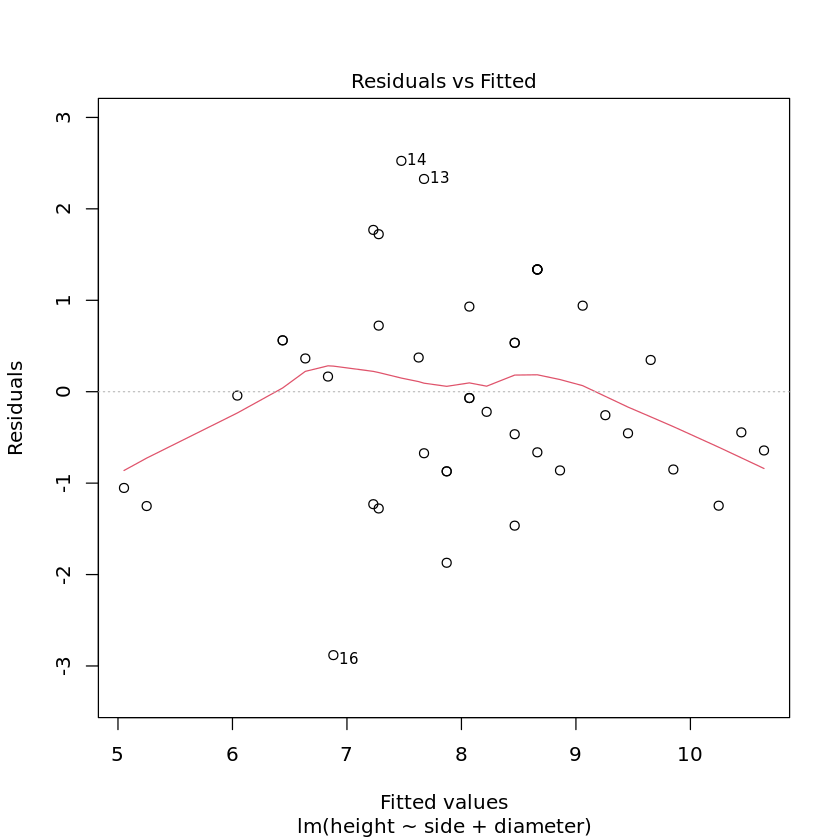

In [8]:
# Obtain the residual plot
plot(heightParallelFit, 1)
# Obtain the normal probability plot
plot(heightParallelFit, 2)